In [1]:
import torch
from torch import nn
torch.__version__

'1.13.1+cu116'

Setting device to cuda if available

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Getting data
in our case, we have already downloaded the data in .zip format
so in the snippet below we are going to extact it 

In [6]:
import zipfile
from pathlib import Path

# Setup path to the data folder
data_path = Path("data/")
image_path = data_path / "cats_dogs"

# making the image folder and unzipping the dataset

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    image_path.mkdir(parents=True, exist_ok= True)
    with zipfile.ZipFile(data_path / "kagglecatsanddogs_3367a.zip" , "r") as zip_ref :
        print("unzipping the file..")
        zip_ref.extractall(image_path)

data\cats_dogs directory exists.


# Exploring the data 
now we are going to devide our images into to folders called, train and test
in each contating to folders called cats and dogs

In [7]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents
    Args : dir_path (str or pathlib.Path): target directory

    Returns A print of: 
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
walk_through_dir(image_path)

There are 3 directories and 2 images in 'data\cats_dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\PetImages'.
There are 0 directories and 0 images in 'data\cats_dogs\PetImages\Cat'.
There are 0 directories and 0 images in 'data\cats_dogs\PetImages\Dog'.
There are 2 directories and 0 images in 'data\cats_dogs\test'.
There are 0 directories and 2500 images in 'data\cats_dogs\test\cats'.
There are 0 directories and 2500 images in 'data\cats_dogs\test\dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\train'.
There are 0 directories and 10001 images in 'data\cats_dogs\train\cats'.
There are 0 directories and 10001 images in 'data\cats_dogs\train\dogs'.


## Creating train and test directories 


In [9]:
def creat_folders(dir_path,folder_name):
    """
    Makes a new directory using the driectory path 
    Args : 
        dir_path (str or pathlib.Path): target directory
        folder_name (str): name of the desired folder
    """
    new_folder = os.path.join(dir_path, folder_name)
    os.makedirs(new_folder)


In [21]:
# makeing train and test directories including cats and dogs folders in each

train_dir = image_path / "train"
test_dir = image_path / "test"

if train_dir.is_dir():
    print(f"{train_dir} directory exists.")
else:
    data_dir = image_path
    creat_folders(data_dir,"train")
    
if test_dir.is_dir():
    print(f"{test_dir} directory exists.")
else:
    data_dir = image_path
    creat_folders(data_dir,"test")

categories = ["cats" , "dogs"]
for item in categories:
    creat_folders(train_dir , item)
    creat_folders(test_dir , item)

In [10]:
import os
import random
import shutil

def move_files(source_dir, destination_dir, num_files , seed = 42):
    """
    moves some random files from one directory to another, if num_files is set to -1,
        moves all of the files from the source 
    Args : 
         source_dir : the path to the source directory
         destination_dir : the path to the destination directory
         num_files : the number of random files you want to move
         seed : the seed number
    """
    if num_files == -1 :
        files = os.listdir(source_dir)
        selected_files = files
    else: 
        random.seed(seed)
        # Get a list of all files in the source directory
        files = os.listdir(source_dir)
        # Randomly select 'num_files' files from the list
        selected_files = random.sample(files, num_files)
    
    # Move the selected files to the destination directory
    for file_name in selected_files:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)

In [29]:
# using walk_through_dir to see where the images are 
walk_through_dir(image_path)

There are 3 directories and 2 images in 'data\cats_dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\PetImages'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Cat'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Dog'.
There are 2 directories and 0 images in 'data\cats_dogs\test'.
There are 0 directories and 0 images in 'data\cats_dogs\test\cats'.
There are 0 directories and 0 images in 'data\cats_dogs\test\dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\train'.
There are 0 directories and 0 images in 'data\cats_dogs\train\cats'.
There are 0 directories and 0 images in 'data\cats_dogs\train\dogs'.


In [41]:
# moveing images from source directory in to the train and test driectories
## moving some randome images from source to test directory for both categories 

cat_images_source_directory =  image_path / "Petimages" / "Cat"
dog_images_source_directory =  image_path / "Petimages" / "Dog"
dog_test_destination_directory = test_dir / "dogs"
cat_test_destination_directory = test_dir / "cats"
cat_train_destination_directory = train_dir / "cats"
dog_train_destination_directory = train_dir / "dogs"

train_test_split = 0.2
num_test_images = int(12501 * train_test_split)
# cat images 
move_files(cat_images_source_directory, cat_test_destination_directory, num_files= num_test_images, seed= 42 )
# dog images 
move_files(dog_images_source_directory, dog_test_destination_directory, num_files= num_test_images, seed= 42 )

# now that we have the test images , we move the rest of the source images to the train folder

# cat images 
move_files(cat_images_source_directory, cat_train_destination_directory, num_files= -1)
# dog images 
move_files(dog_images_source_directory, dog_train_destination_directory, num_files= -1)

# Visualizing an image to get some information
    1- Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
    2- Pick a random image path using Python's random.choice().
    3- Get the image class name using pathlib.Path.parent.stem.
    4- And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
    5- We'll then show the image and print some metadata.


Random image path: data\cats_dogs\train\dogs\5421.jpg
Image class: dogs
Image height: 324
Image width: 460


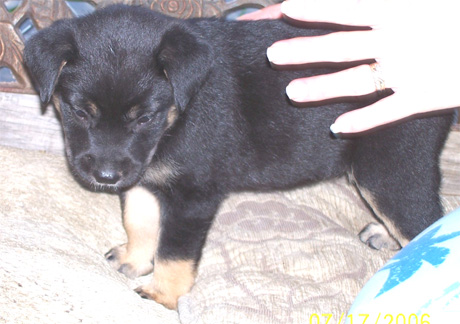

In [11]:
import random
from PIL import Image

# setting seed
random.seed(42)

# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# get random image path
random_image_path = random.choice(image_path_list)

# get hte image class name
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print some metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

# Transforming data
transforming images into tensors ...

In [3]:
# import base libraries
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [18]:
# transforming data with torchvission.transform
# write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

Visualizing some images and their transformed version

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

# Using ImageFolder to creat datasets
time to turn our image data into a Dataset capable of being used with PyTorch.
Since our data is in standard image classification format, we can use the class torchvision.datasets.ImageFolder.

In [19]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 20000
    Root location: data\cats_dogs\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 5000
    Root location: data\cats_dogs\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [18]:
# checking out the classes and class_to_idx
# get class names as a list
class_names = train_data.classes
class_names

['cats', 'dogs']

In [19]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'cats': 0, 'dogs': 1}

In [23]:
# Check the lengths
len(train_data), len(test_data)

(20000, 5000)

In [20]:
# take a look at images and labels
img , label = train_data[0][0] , train_data [0][1]
print(f"image tensor:\n{img}")
print(f"image shape:\n{img.shape}")
print(f"image datatype:\n{img.dtype}")
print(f"image label:\n{label}")
print(f"image labeltype:\n{type(label)}")

image tensor:
tensor([[[0.9529, 0.9647, 0.9725,  ..., 0.8627, 0.8353, 0.8118],
         [0.9569, 0.9647, 0.9725,  ..., 0.8627, 0.8353, 0.8157],
         [0.9647, 0.9647, 0.9686,  ..., 0.8627, 0.8392, 0.8196],
         ...,
         [0.0118, 0.0118, 0.0118,  ..., 0.6667, 0.6510, 0.6392],
         [0.0118, 0.0118, 0.0118,  ..., 0.6549, 0.6353, 0.6275],
         [0.0078, 0.0078, 0.0078,  ..., 0.6431, 0.6196, 0.6078]],

        [[0.8000, 0.8196, 0.8431,  ..., 0.7059, 0.6824, 0.6588],
         [0.8118, 0.8314, 0.8510,  ..., 0.7059, 0.6824, 0.6627],
         [0.8235, 0.8431, 0.8510,  ..., 0.7020, 0.6824, 0.6627],
         ...,
         [0.0157, 0.0157, 0.0157,  ..., 0.5255, 0.5137, 0.5020],
         [0.0157, 0.0157, 0.0157,  ..., 0.5137, 0.5020, 0.4941],
         [0.0078, 0.0078, 0.0078,  ..., 0.5098, 0.4980, 0.4863]],

        [[0.4824, 0.5059, 0.5412,  ..., 0.3961, 0.3804, 0.3569],
         [0.4980, 0.5255, 0.5529,  ..., 0.3961, 0.3804, 0.3608],
         [0.5176, 0.5373, 0.5490,  ..., 0.39

In [25]:
img.shape

torch.Size([3, 64, 64])

## Turn loaded images into Dataloader
We've got our images as PyTorch Dataset's but now let's turn them into DataLoader's.
We'll do so using torch.utils.data.DataLoader.
Turning our Dataset's into DataLoader's makes them iterable so a model can go through learn the relationships between samples and targets (features and labels).

In [21]:
import os
os.cpu_count()

8

In [22]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
import os
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=8, 
                             num_workers=os.cpu_count(), 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2495b0659f0>,
 <torch.utils.data.dataloader.DataLoader at 0x249628f1810>)

In [23]:
# now our data is iterable
# checking the shapes
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([8, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([8])


# Alternative way of making dataset and data loader
What if a pre-built Dataset creator like torchvision.datasets.ImageFolder() didn't exist?
We'll start by importing the modules we need:

    Python's os for dealing with directories (our data is stored in directories).
    Python's pathlib for dealing with filepaths (each of our images has a unique filepath).
    torch for all things PyTorch.
    PIL's Image class for loading images.
    torch.utils.data.Dataset to subclass and create our own custom Dataset.
    torchvision.transforms to turn our images into tensors.
    Various types from Python's typing module to add type hints to our code.


In [24]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
# creating a helper function to get class names
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """
    Finds the class folder names in a target directory.
    Assumes target directory is in standard image classification format.
    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [26]:
find_classes(test_dir)

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

### creat a custom Dataset to replicate ImageFolder
We'll build one to replicate the functionality of torchvision.datasets.ImageFolder().

In [27]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
# sub class torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
    # Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, target_dir: str, transform: None):
        # creat calss attributes
        # get all image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        # setup transforms
        self.transform = transform
        # creat classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)
    
    # make function to load images
    def load_image(self, index: int) -> Image.Image:
        "opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)
    # Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    # Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]
        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)


In [28]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [29]:
train_data_custom = ImageFolderCustom(target_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2496279bbe0>,
 <__main__.ImageFolderCustom at 0x24962916d10>)

In [30]:
len(train_data_custom), len(test_data_custom)

(20000, 5000)

In [31]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### creat a function to display random images


In [32]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

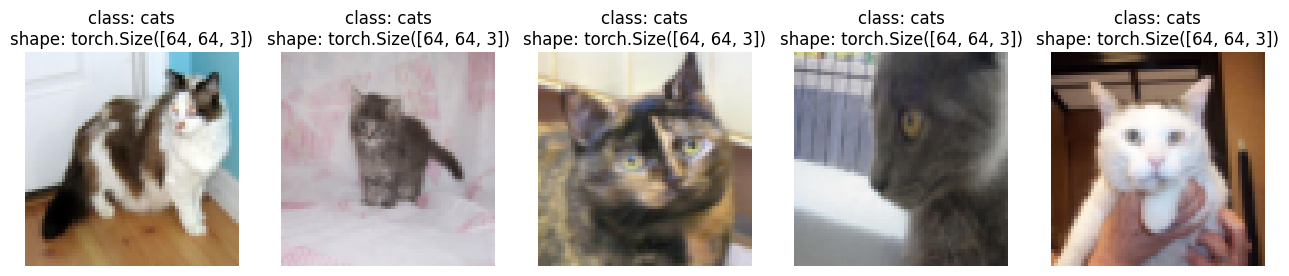

In [33]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


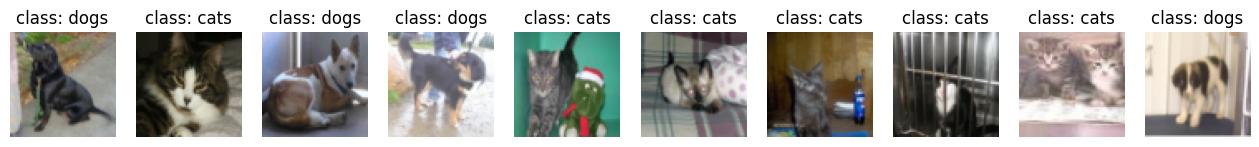

In [34]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

### Turn custom loaded images into DataLoader's
We've got a way to turn our raw images into Dataset's (features mapped to labels or X's mapped to y's) through our ImageFolderCustom class.
Because our custom Dataset's subclass torch.utils.data.Dataset, we can use them directly with torch.utils.data.DataLoader().

In [35]:
# turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset= train_data_custom,
                                     batch_size= 8,
                                     num_workers= os.cpu_count(),
                                     shuffle= True)
test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                    batch_size=8,
                                    num_workers= os.cpu_count(),
                                    shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x24962db1750>,
 <torch.utils.data.dataloader.DataLoader at 0x24962db0130>)

In [65]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

In [8]:
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "cats_dogs"
train_dir = image_path / "train"
test_dir = image_path / "test"
cat_images_source_directory =  image_path / "Petimages" / "Cat"
dog_images_source_directory =  image_path / "Petimages" / "Dog"
dog_test_destination_directory = test_dir / "dogs"
cat_test_destination_directory = test_dir / "cats"
cat_train_destination_directory = train_dir / "cats"
dog_train_destination_directory = train_dir / "dogs"

# first MODEL: MODEL0 without data augmentation


In [9]:
# creat simple transform 
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
])

In [10]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 8 workers.


(<torch.utils.data.dataloader.DataLoader at 0x260da6ceda0>,
 <torch.utils.data.dataloader.DataLoader at 0x260f97f7cd0>)

## Creat TinyVGG model class

In [11]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape, 
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units, 
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units*16*16,
                      out_features= output_shape)
        )
    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # print(x.shape)
        # x = self.classifier(x)
        # print(x.shape)
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))


In [41]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

### forward pass on a single image

To do a forward pass on a single image, let's:

    Get a batch of images and labels from the DataLoader.
    Get a single image from the batch and unsqueeze() the image so it has a batch size of 1 (so its shape fits the model).
    Perform inference on a single image (making sure to send the image to the target device).
    Print out what's happening and convert the model's raw output logits to prediction probabilities with torch.softmax() and convert the prediction probabilities to prediction labels with torch.argmax().


In [42]:
# get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# get a single image from the batch and unsqueeze the image so its shape fits the model
img_single , label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0495, 0.0540]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4989, 0.5011]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


### use torchinfo to get an idea of the shapes going through our model

In [12]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

NameError: name 'model_0' is not defined

# Create train and test loop functions

In [13]:
def train_step(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer):
    # put model in train mode
    model.train()

    # setup train loss and train accuracy values
    train_loss , train_acc = 0 , 0

    # loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        
        # send data to the target device
        X , y = X.to(device), y.to(device)

        # forward pass
        y_pred = model(X)

        # calculate and accumulate loss
        loss = loss_fn(y_pred , y)
        train_loss += loss.item()

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [14]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

## creating train() function to combine train_step() and test_step()

In [15]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    # creating empty results dictionary
    results = {"train_loss" : [],
               "train_acc" : [],
               "test_loss" : [],
               "test_acc" : []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

## training the model

In [1]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

NameError: name 'torch' is not defined